<a href="https://colab.research.google.com/github/ZHAbotorabi/Supply-Chain/blob/main/SupplyChain_Segmentation_ABC_Kraljic_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import inventorize3 as inv


retail= pd.read_csv('online_retail2.csv')

retail= retail.drop_duplicates()
retail= retail.dropna()
retail= retail[retail.Quantity > 0]
retail_clean= retail.copy()
retail_clean['Revenue']= retail['Price']* retail['Quantity']
retail_clean.to_csv('retail_clean.csv')
retail_clean.columns
grouped= retail_clean.groupby('Description'
            ).agg(total_sales= ('Quantity',np.sum),
                  total_revenue= ('Revenue',np.sum)).reset_index()

grouped.to_csv('for_abc.csv')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
retail= pd.read_csv('for_abc.csv')
retail.head()

,Unnamed: 0,Description,total_sales,total_revenue
0,0,DOORMAT UNION JACK GUNS AND ROSES,167,1071.25
1,1,3 STRIPEY MICE FELTCRAFT,662,1241.10
2,2,4 PURPLE FLOCK DINNER CANDLES,324,495.16
3,3,50'S CHRISTMAS GIFT BAG LARGE,1885,2272.25
4,4,ANIMAL STICKERS,385,80.85


In [ ]:
retail.shape

(5283, 4)

In [ ]:
!pip install inventorize3

  Preparing metadata (setup.py) ... done
  Created wheel for inventorize3: filename=inventorize3-0.0.1-py3-none-any.whl size=15575 sha256=12e51c9d3fc01616a81b0f65488314d68c7c8e4fe4768ef8059069cf33d384ff
  Stored in directory: /root/.cache/pip/wheels/ae/d4/df/815f49f2418a0401c7acc4885da25581ce1f5396bdb6411cf3
Successfully built inventorize3


In [ ]:
import inventorize3 as inv

### ABC Segmentation

| Category | Percentage of Items | Percentage of Value | Characteristics |
|----------|---------------------|---------------------|----------------|
| **A Items** | ~20% of items | ~80% of value | High-value items, require tight inventory control, frequent review |
| **B Items** | ~30% of items | ~15% of value | Medium-value items, moderate control, periodic review |
| **C Items** | ~50% of items | ~5% of value | Low-value items, minimal control, bulk purchasing, infrequent review |


In [ ]:
a=inv.ABC(retail[['Description','total_sales']])
a

,Description,total_sales,Percentage,comulative,Category
5168,WORLD WAR 2 GLIDERS ASSTD DESIGNS,105185,9.990307e-03,0.009990,A
5047,WHITE HANGING HEART T-LIGHT HOLDER,91757,8.714937e-03,0.018705,A
3129,"PAPER CRAFT , LITTLE BIRDIE",80995,7.692779e-03,0.026398,A
292,ASSORTED COLOUR BIRD ORNAMENT,78234,7.430543e-03,0.033829,A
2695,MEDIUM CERAMIC TOP STORAGE JAR,77916,7.400340e-03,0.041229,A
...,...,...,...,...,...
3451,PINK STRIPES SHOULDER BAG,1,9.497844e-08,1.000000,C
4370,SILVER AND BLACK ORBIT NECKLACE,1,9.497844e-08,1.000000,C
479,BLACK DIAMOND CLUSTER EARRINGS,1,9.497844e-08,1.000000,C
4271,SET/2 SPOTTY + ROSE TEA TOWELS,1,9.497844e-08,1.000000,C


In [ ]:
a.Category.value_counts()

,count
Category,
C,2881
B,1245
A,1157


<ipython-input-18-0624d5ac514d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category',data=a,palette='viridis')


<Axes: xlabel='Category', ylabel='count'>

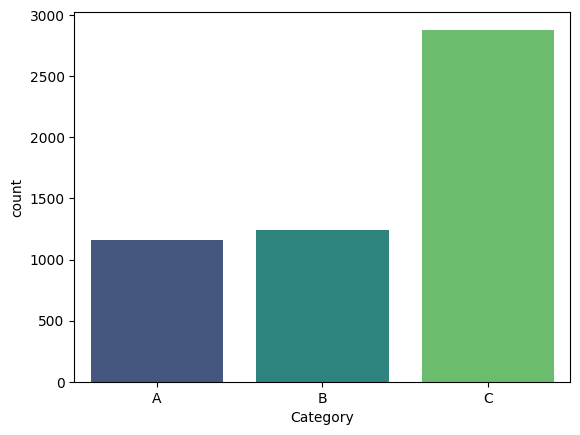

In [ ]:
sns.countplot(x='Category',data=a,palette='viridis')

<ipython-input-20-e0d46c75e3eb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Category',y= 'total_sales',data=a, palette='viridis')


<Axes: xlabel='Category', ylabel='total_sales'>

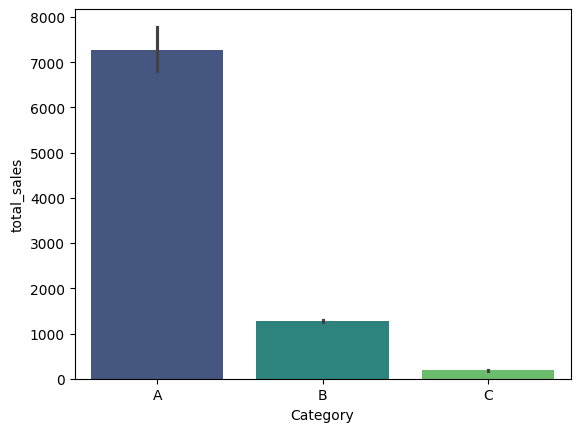

In [ ]:
sns.barplot(x= 'Category',y= 'total_sales',data=a, palette='viridis')

In [ ]:
#### multi creteria abc analyisis

b=inv.productmix(retail['Description'],retail['total_sales'],retail['total_revenue'])
b.columns

Index(['skus', 'sales', 'revenue', 'sales_mix', 'comulative_sales',
       'revenue_mix', 'comulative_revenue', 'sales_category',
       'revenue_category', 'product_mix'],
      dtype='object')

In [ ]:
b.head()

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
3769,REGENCY CAKESTAND 3 TIER,24139,277656.25,0.002293,0.177816,0.015980,0.015980,A,A,A_A
5047,WHITE HANGING HEART T-LIGHT HOLDER,91757,247048.01,0.008715,0.018705,0.014219,0.030199,A,A,A_A
3129,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60,0.007693,0.026398,0.009696,0.039895,A,A,A_A
2860,Manual,9391,151777.67,0.000892,0.424068,0.008736,0.048631,A,A,A_A
2392,JUMBO BAG RED RETROSPOT,74224,134307.44,0.007050,0.048279,0.007730,0.056361,A,A,A_A


In [ ]:
b.product_mix.value_counts()

,count
product_mix,
C_C,2394
A_A,775
B_B,632
C_B,413
B_C,325
A_B,317
B_A,288
C_A,74
A_C,65


<ipython-input-27-1dabe7ce2669>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_mix',data= b,palette='viridis')


<Axes: xlabel='product_mix', ylabel='count'>

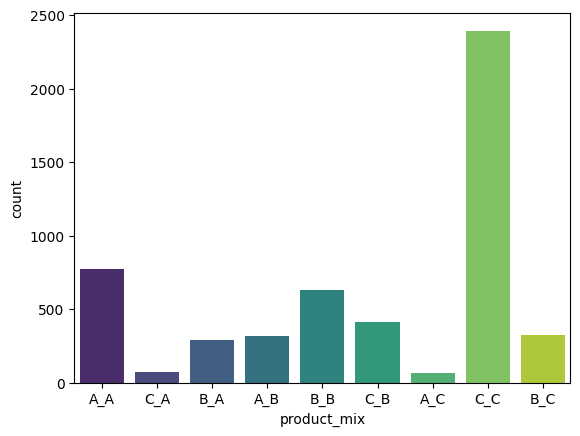

In [ ]:
sns.countplot(x='product_mix',data= b,palette='viridis')

<ipython-input-28-c358e86fb35b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_mix',y='sales',data= b,palette='viridis')


<Axes: xlabel='product_mix', ylabel='sales'>

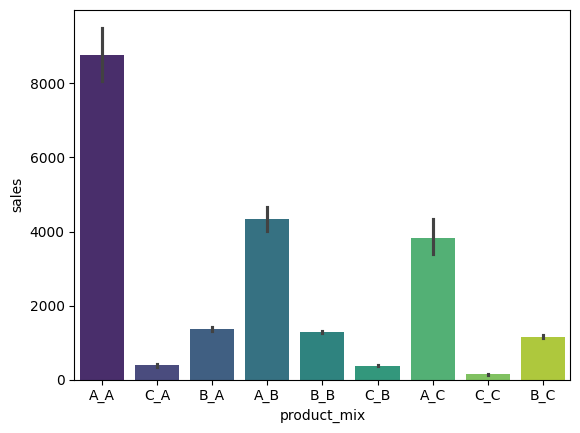

In [ ]:
sns.barplot(x='product_mix',y='sales',data= b,palette='viridis')

<ipython-input-29-f93f2735f958>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_mix',y='revenue',data= b,palette='viridis')


<Axes: xlabel='product_mix', ylabel='revenue'>

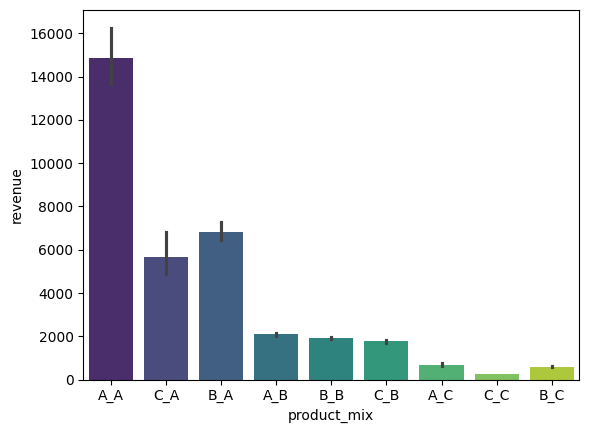

In [ ]:
sns.barplot(x='product_mix',y='revenue',data= b,palette='viridis')

In [ ]:
retail_clean.groupby(['Country','Description']).agg(total_sales=('Quantity',np.sum),
                                                    total_revenue= ('Revenue',np.sum)).reset_index()

## Manipulation of data to multi-creteria
by_store= retail_clean.groupby(['Country','Description']).agg(total_sales=('Quantity',np.sum),
                                                    total_revenue= ('Revenue',np.sum)).reset_index()

mix_country=inv.productmix_storelevel(by_store['Description'],
                          by_store['total_sales'],
                          by_store['total_revenue'],
                          by_store['Country'])

mix_country.columns

product_mix=mix_country.groupby(['storeofsku','product_mix']).count().reset_index().iloc[:,0:3]


product_mix[product_mix.storeofsku=='Australia']

# supplier segmentation

In [ ]:
##### supplier segmentation

supplier= pd.read_csv('supplier_data.csv')
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596


In [ ]:
supplier.columns

Index(['supplier', 'product', 'availability', 'no_suppliers', 'standard',
       'price_fluctuation', 'Quantity', 'price'],
      dtype='object')

### Kraljic Matrix

| Category                        | Supply Risk | Profit Impact | Characteristics |
|---------------------------------|-------------|--------------|--------------------------------------------------------------------|
| **Leverage Items**              | Low         | High         | Standardized, widely available, price-sensitive, cost-saving opportunity |
| **Strategic Items**             | High        | High         | Unique, critical for differentiation, limited suppliers |
| **Bottleneck Items**            | High        | Low          | Hard to source, sole supplier dependency, operational risk |
| **Non-Critical (Routine) Items** | Low         | Low          | Common, low-value, abundant supply |


In [ ]:
supplier['risk_index']= supplier['availability']+supplier['no_suppliers']+supplier['standard']+supplier['price_fluctuation']

In [ ]:
supplier['value']= supplier['price']*supplier ['Quantity']
supplier.value.describe()


,value
count,2.400000e+01
mean,5.064812e+06
std,4.847504e+06
min,1.189500e+05
25%,7.975622e+05
50%,3.011452e+06
75%,8.499426e+06
max,1.399081e+07


# avg->  50%	->>>  3.011452e+06 =3000000

In [ ]:
def category(x,y):
    if((x>= 3000000)& (y >= 1)):
        return 'strategic'
    if((x>= 3000000)& (y < 1)):
        return 'leverage'
    if((x < 3000000)& (y >= 1)):
        return 'Critical'
    if((x < 3000000)& (y < 1)):
        return 'Routine'

In [ ]:
for i in range(supplier.shape[0]):
    supplier.loc[i,'category']=category(supplier.loc[i,'value'],
                                        supplier.loc[i,'risk_index'])

In [ ]:
supplier.category.value_counts()

,count
category,
Critical,10
strategic,8
leverage,4
Routine,2


<Axes: xlabel='value', ylabel='risk_index'>

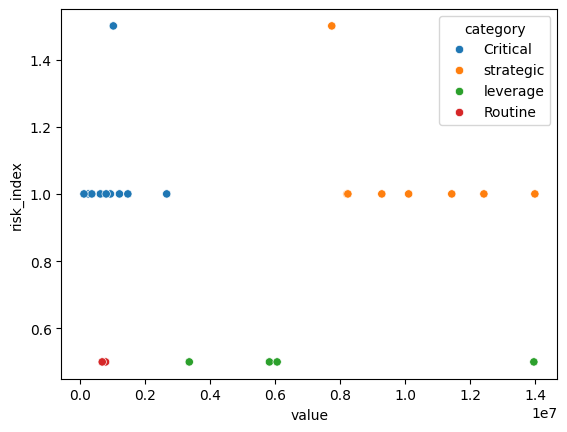

In [ ]:
sns.scatterplot(x='value',y='risk_index',data=supplier, hue='category')